# Phase 1 Code Challenge Review 


TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from the seaborn package
df = sns.load_dataset('iris')


## Show the first 5 rows of the df


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Examine the dimensions of the dataframe. How many rows and columns?


In [4]:
df.shape

(150, 5)

In [39]:
#.head() is a method, it does an operation. Does something.
#.shape is an attribute. Its a tuple that refers to the shape. Attributes just pull that data.

## Check to see if there are are missing values.


In [5]:
df.isna().sum()
#.isnull() does the same thing.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Create a new column, that is 10 times the sepal length, called sepal_length_10

In [41]:
df['sepal_length_10'] = df['sepal_length']*10
#df['sepal_length_10']

## List all of the different types of species in this DF  and get a count for each species. 

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

# Create a Bar chart showing the average petal length for each species 


In [47]:
#df.groupby('species')['petal_length'].mean()

In [49]:
#list(df.groupby('species')['petal_length'].mean().values) would change it into a list

Text(0, 0.5, 'length in inches')

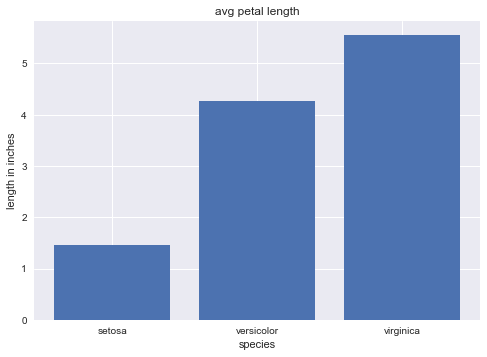

In [48]:
#matplotlib way
fig, ax = plt.subplots()
ax.bar(
    x = df['species'].unique(),
    height = df.groupby('species')['petal_length'].mean()
    # '....mean().values' This will give you just the values. '.keys()' or 'index' would give you the names
)
ax.set_title('avg petal length')
ax.set_xlabel('species')
ax.set_ylabel('length in inches')

<AxesSubplot:title={'center':'Title'}, xlabel='species'>

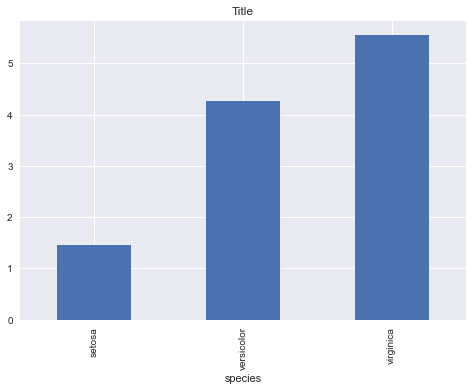

In [51]:
#The pandas way
df.groupby('species')['petal_length'].mean().plot(kind='bar', title='Title')

## Create a Scatterplot of for sepal length and sepal width

Text(0, 0.5, 'sepal width')

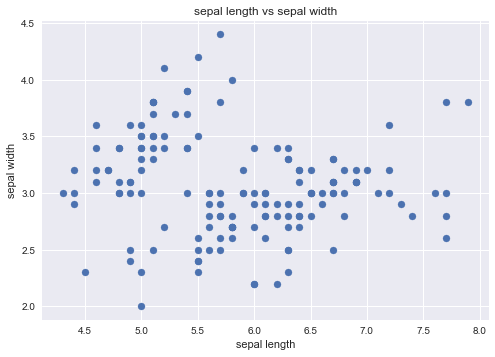

In [54]:
fig, ax2 = plt.subplots()
ax2.scatter(
    x = df['sepal_length'],
    y = df['sepal_width']
)
ax2.set_title('sepal length vs sepal width')
ax2.set_xlabel('sepal length')
ax2.set_ylabel('sepal width')

In [55]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.117570,0.871754,0.817941,1.000000
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.117570
petal_length,0.871754,-0.428440,1.000000,0.962865,0.871754
petal_width,0.817941,-0.366126,0.962865,1.000000,0.817941
sepal_length_10,1.000000,-0.117570,0.871754,0.817941,1.000000


## Using the correlation matrix above, describe the relationship between petal length and sepal width.


In [56]:
'''
There is a negative correlation between the length of the petals and the width of the sepal.
This indicates that as one increases, the other generally decreases. Looking at petal length and sepal width as a whole,
one would expect that as the length of the petal increase, the width of the sepal decreases.
'''

'\nThere is a negative correlation between the length of the petals and the width of the sepal.\nThis indicates that as one increases, the other generally decreases. Looking at petal length and sepal width as a whole,\none would expect that as the length of the petal increase, the width of the sepal decreases.\n'

## Identify the longest pedal length for each species of flower

In [57]:
df.groupby('species')['petal_length'].max()

species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [58]:
df.sort_values(by = 'petal_length', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
118,7.7,2.6,6.9,2.3,virginica,77.0


In [59]:
# use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
118,7.7,2.6,6.9,2.3,virginica,77.0


#### 4. Python Data Structure 

Can you parse this data structure to show where the money resides?

In [10]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [11]:
# get to the money 
print(get_money['get'][0]['get'][0]['get'])

money


In [12]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [13]:
names = [name for name in groomer_info['pets'][0]]
#names
#note: calling a function on a dictionary will return keys.

In [14]:
print(names)

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']


## Create a list that contain all pets' types


In [63]:
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
pet_type = [x[0]['type'] for x in groomer_info['pets'][0].values()]
pet_type

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [ ]:
#This is the 'for loop' way
types = []
for x in groomer_info['pets'][0].values():
    types.append(x[0]['type'])
print(types)

## Create a function that takes a list of pets and a target age, and returns the names of pets who are older than that age.


In [64]:
#age = 4

In [66]:
#info = groomer_info['pets'][0]

In [71]:
#info_age = [x[0]['age'] for x in groomer_info['pets'][0].values()]
#info_age

[5, 1, 8, 2]

In [74]:
#This is written out slowly and then we can grab this and put it in the function. Uncomment from age to run.
#pet_names = []
#for pet in info:
#    if info[pet][0]['age'] > age:
#        pet_names.append(pet)

In [72]:
def pets_older_than(groomer_info, age):
    pet_names = []
    for pet in info:
        if info[pet][0]['age'] > age:
            pet_names.append(pet)
    return pet_names

In [78]:
pets_older_than(groomer_info,0)
#>>> ['Ginger','Joe Rogan']

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']